<a href="https://colab.research.google.com/github/Megh-Zyke/Basic_MLprojects/blob/main/logistic/Copy_of_Titanic_Survival_Prediction_using_Logistic_Regression_Megh.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Logistic Regression

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression as lr
from sklearn.metrics import accuracy_score

Data collection and Manipulation

In [ ]:
#loading the data to panda dataframe
titanic_table=pd.read_csv('/content/Titanic_train.csv')

In [ ]:
#first five entries of the dataframe
titanic_table.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# number of rows and columns
titanic_table.shape

(891, 12)

In [ ]:
# heading of all the columns
titanic_table.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
# dataframe information
titanic_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
# checking the number of missing values in each column
titanic_table.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Handling the missing values

In [ ]:
# dropping the column Cabin because it has the most number of NaN values
titanic_table=titanic_table.drop(columns='Cabin', axis=1)

In [ ]:
# replacing the mean value of age in place of NaN values in age
titanic_table['Age']=titanic_table['Age'].replace(np.nan,titanic_table['Age'].mean())

In [ ]:
titanic_table['Embarked'].mode()

0    S
dtype: object

In [ ]:
#replacing the mode of Embarked with NaN value of Embarked
titanic_table['Embarked'].mode()[0]
titanic_table['Embarked']=titanic_table['Embarked'].replace(np.nan,titanic_table['Embarked'].mode()[0])

In [ ]:
titanic_table.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

Data Analysis 

In [ ]:
# statistical measures of numerical data
titanic_table.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
# finding the number of people survived
titanic_table['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

Visulation of data

In [ ]:
sns.set()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


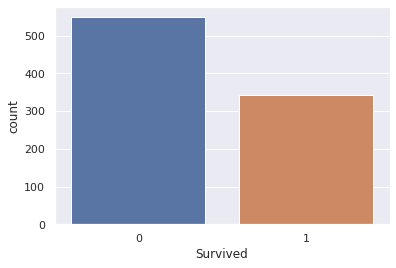

In [ ]:
# count plot for "survived column"
sns.countplot('Survived', data=titanic_table)

In [ ]:
titanic_table['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


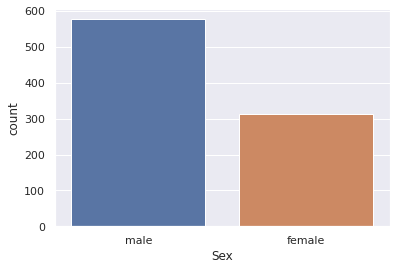

In [ ]:
# count plot for "Gender column"
sns.countplot('Sex', data=titanic_table)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


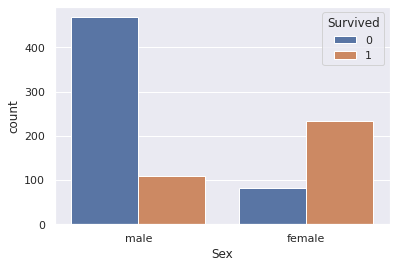

In [ ]:
# number of survivors based on gender
sns.countplot('Sex' , hue = 'Survived' , data=titanic_table)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


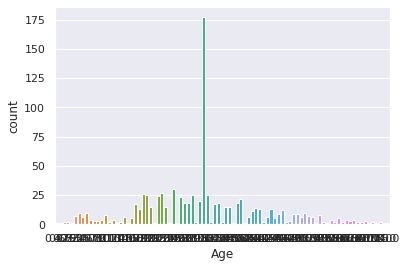

In [ ]:
# count plot for "Age column"
sns.countplot('Age', data=titanic_table)

Replacing categorical columns into numerical data

In [ ]:
# replacing all male values = 0  and females = 1
titanic_table['Sex']=titanic_table['Sex'].replace(['male'],0)
titanic_table['Sex']=titanic_table['Sex'].replace(['female'],1)

In [ ]:
titanic_table['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [ ]:
# replacing all S = 0  and c = 1 Q=2
titanic_table['Embarked']=titanic_table['Embarked'].replace(['S'],0)
titanic_table['Embarked']=titanic_table['Embarked'].replace(['C'],1)
titanic_table['Embarked']=titanic_table['Embarked'].replace(['Q'],2)

In [ ]:
titanic_table=titanic_table.drop(columns='Name', axis=1)

In [ ]:
X=titanic_table.drop(columns=['Ticket' ,'PassengerId','Survived'], axis=1)
Y=titanic_table.Survived

In [ ]:
print(Y)

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


In [ ]:
print(X)

     Pclass  Sex        Age  SibSp  Parch     Fare  Embarked
0         3    0  22.000000      1      0   7.2500         0
1         1    1  38.000000      1      0  71.2833         1
2         3    1  26.000000      0      0   7.9250         0
3         1    1  35.000000      1      0  53.1000         0
4         3    0  35.000000      0      0   8.0500         0
..      ...  ...        ...    ...    ...      ...       ...
886       2    0  27.000000      0      0  13.0000         0
887       1    1  19.000000      0      0  30.0000         0
888       3    1  29.699118      1      2  23.4500         0
889       1    0  26.000000      0      0  30.0000         1
890       3    0  32.000000      0      0   7.7500         2

[891 rows x 7 columns]


In [ ]:
#these are the tables we use for training and regression

Spiltting the data into training and Test Data

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2 , random_state=3)

In [ ]:
print(X.shape, X_train.shape , X_test.shape)

(891, 7) (712, 7) (179, 7)


In [ ]:
print(Y.shape, Y_train.shape , Y_test.shape)

(891,) (712,) (179,)


Model Training : Logistic Regression

In [ ]:
model = lr()

In [ ]:
#training the Logistic Regression with training data
model.fit(X_train,Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

Evaluation of model

Accuracy Score

In [ ]:
# accuracy on the training data
X_train_prediction = model.predict(X_train)

In [ ]:
print(X_train_prediction)

[0 1 1 1 0 1 0 0 1 0 0 0 0 0 1 1 0 0 1 0 0 0 0 1 0 1 1 1 1 0 0 0 0 0 0 0 0
 0 0 1 1 0 0 1 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 1 0 0 1 1 0 1 0 0 1
 0 1 1 0 0 1 0 1 1 1 0 1 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0
 1 0 0 1 0 1 0 1 0 1 0 1 0 0 0 1 1 0 0 1 0 0 0 0 1 1 0 1 1 0 0 1 0 0 1 0 0
 0 0 0 0 0 1 1 1 1 0 0 0 1 0 0 0 0 0 1 0 0 0 1 1 1 0 0 0 0 1 0 0 0 0 0 0 1
 1 0 0 0 1 0 0 1 1 0 0 0 1 1 0 0 1 0 0 0 1 1 0 0 1 0 1 0 0 0 1 0 1 1 0 1 1
 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 1 0 0 1 1 0 0 1 0 0 0 0 0 0 1
 0 0 0 1 0 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 1 0 1 1 1 0 0 0 1 0 1 0 1 0 0 1 1
 0 1 0 1 0 0 1 1 0 0 1 1 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 0 0 1 0 0 0 1 1 0 0
 0 0 0 1 0 1 1 0 1 0 0 0 0 0 1 0 0 0 1 1 0 0 1 0 0 1 1 0 1 1 1 0 0 1 1 0 0
 1 0 1 1 0 0 0 0 0 1 1 1 1 0 0 0 1 0 1 0 0 0 1 0 1 0 0 0 1 0 0 1 0 0 0 0 0
 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 1 0 0 1 1 0 0 0 0 0
 0 0 0 1 0 1 0 0 1 1 1 0 0 1 1 0 0 1 0 0 0 1 0 0 0 0 1 0 1 0 1 0 0 1 1 0 0
 0 0 0 0 0 0 0 0 1 1 0 1 

In [ ]:
traing_data_accuracy = accuracy_score(Y_train,X_train_prediction)
print("The accuracy of the training data is : ",traing_data_accuracy*100,'%')

The accuracy of the training data is :  80.89887640449437 %


In [ ]:
# accuracy in the test data
X_test_predict = model.predict(X_test)

In [ ]:
print(X_test_predict)

[0 0 0 0 1 0 1 0 1 0 0 0 1 0 1 0 1 0 0 1 1 1 0 1 1 0 1 0 1 1 1 1 1 1 0 0 0
 0 0 0 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 0 0 0 0 0 1 0 1 0 0 1 1 0 1 1 0 0 1
 1 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 1 0 1 1 1
 0 0 0 1 1 0 1 0 0 1 1 0 0 1 0 0 1 0 1 1 0 1 0 1 1 1 0 1 0 0 1 1 0 1 0 1 0
 0 1 1 0 0 1 1 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 1]


In [ ]:
# testing the accuracy score of x_test
accuracy= accuracy_score(Y_test,X_test_predict)
print("The Accuracy score of test data : ",accuracy*100,'%')

The Accuracy score of test data :  77.09497206703911 %


Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix
matrix=confusion_matrix(Y_test,X_test_predict)
print(matrix)

[[85 24]
 [17 53]]


Text(0.5, 1.0, 'Confusion Matrix')

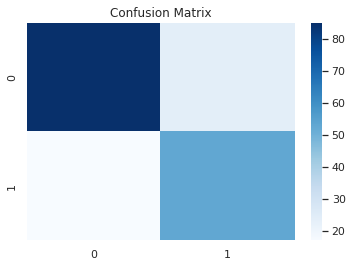

In [ ]:
ax = plt.axes()
sns.heatmap(matrix , cmap= 'Blues')
ax.set_title('Confusion Matrix')